In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def getData(limit = None):
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y

In [12]:
class Perceptron:
    def fit(self, X, Y, learning_rate = 1.0, epochs = 1000):
        D = X.shape[1]
        self.w = np.random.random(D)
        self.b = 0
        
        N = len(Y)
        costs = []
        
        for epoch in range(epochs):
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                break
            i = np.random.choice(incorrect)
            self.w += learning_rate * Y[i] * X[i]
            self.b += learning_rate * Y[i]
            
            c = len(incorrect) / float(N)
            costs.append(c)
        print("Final w: ", self.w, " final b: ", self.b, " epochs: ", (epoch+1), "/", epochs)
        plt.plot(costs)
        plt.show()
    
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

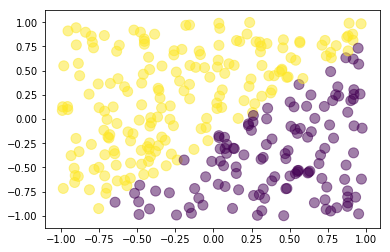

Final w:  [-5.0276992   5.07469005]  final b:  1.0  epochs:  62 / 1000


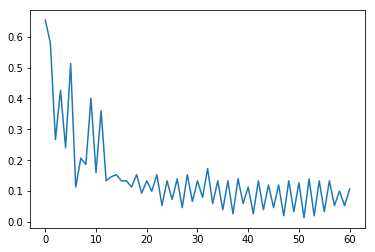

Training Time:  0:00:00.098705
Train accuracy:  1.0
Time to compute train accuracy:  0:00:00.000498
Train accuracy:  1.0
Time to compute test accuracy:  0:00:00


In [13]:
X, Y = getData()
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.5)
plt.show()

Ntrain = int(len(Y) / 2)
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

model = Perceptron()
t0 = datetime.now()
model.fit(Xtrain, Ytrain)
print("Training Time: ", (datetime.now() -  t0))

t0 = datetime.now()
print("Train accuracy: ", model.score(Xtrain, Ytrain))
print("Time to compute train accuracy: ", (datetime.now() - t0))

t0 = datetime.now()
print("Train accuracy: ", model.score(Xtest, Ytest))
print("Time to compute test accuracy: ", (datetime.now() - t0))